# Assignment 3

- Go back to Lab assignment 2 and improve the LR result based on the extensions of LR
- Classify the weakest link based on the 38 predictors of a movement using a few classification variants(different models or model parameterizations)
- Select an accuracy metric
- Test and iteratively improve the accuracy of the variants

## Imports

In [116]:
import sys

sys.path.append("../../scripts")

import dagshub
import mlflow
import ML_utils as MLUtils

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

## Setup

In [ ]:
# Setup dagshub and MLFlow
dagshub.init(repo_owner="SamuelFredricBerg", repo_name="4dt907", mlflow=True)
utils = MLUtils.MLUtils("Project_Model_A2")

# Configs
config = {
    "data_split_seed": 42,
    "test_size": 0.2,
    "n_folds": 5,
    "shuffle": True,

    "n_estimators": 100,
    "max_depth": 7,
    "min_samples_split": 5,
    "variant": "Random Forest - Depth 7",
}

WeakLink_data_path = "../../data/AimoScore_WeakLink_big_scores_A3.csv"
Scores_data_path = "../../data/AimoScore_WeakLink_big_scores_A2.csv"

dfw = pd.read_csv(WeakLink_data_path, index_col=0)
dfs = pd.read_csv(Scores_data_path, index_col=0)

# Cross validation configs
kf = KFold(
    n_splits=config["n_folds"],
    shuffle=config["shuffle"],
    random_state=config["data_split_seed"],
)

Initialized MLflow to track repo "SamuelFredricBerg/4dt907"

Repository SamuelFredricBerg/4dt907 initialized!

# Preprocessing

In [ ]:
def preprocessing(df):
    df_cleaned = df
    return df_cleaned

# Training

## Main Code

Number of columns: 41
Columns names: ['No_1_Angle_Deviation', 'No_2_Angle_Deviation', 'No_3_Angle_Deviation', 'No_4_Angle_Deviation', 'No_5_Angle_Deviation', 'No_6_Angle_Deviation', 'No_7_Angle_Deviation', 'No_8_Angle_Deviation', 'No_9_Angle_Deviation', 'No_10_Angle_Deviation', 'No_11_Angle_Deviation', 'No_12_Angle_Deviation', 'No_13_Angle_Deviation', 'No_1_NASM_Deviation', 'No_2_NASM_Deviation', 'No_3_NASM_Deviation', 'No_4_NASM_Deviation', 'No_5_NASM_Deviation', 'No_6_NASM_Deviation', 'No_7_NASM_Deviation', 'No_8_NASM_Deviation', 'No_9_NASM_Deviation', 'No_10_NASM_Deviation', 'No_11_NASM_Deviation', 'No_12_NASM_Deviation', 'No_13_NASM_Deviation', 'No_14_NASM_Deviation', 'No_15_NASM_Deviation', 'No_16_NASM_Deviation', 'No_17_NASM_Deviation', 'No_18_NASM_Deviation', 'No_19_NASM_Deviation', 'No_20_NASM_Deviation', 'No_21_NASM_Deviation', 'No_22_NASM_Deviation', 'No_23_NASM_Deviation', 'No_24_NASM_Deviation', 'No_25_NASM_Deviation', 'No_1_Time_Deviation', 'No_2_Time_Deviation', 'Estimate

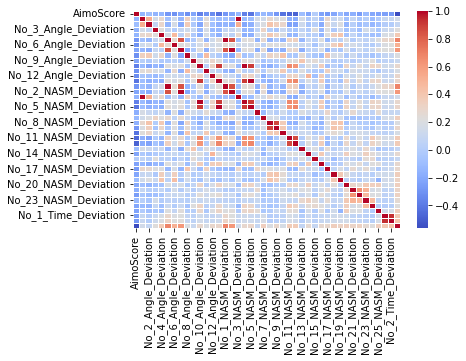

{'R2_Mean': 0.640883414073296, 'R2_Std': 0.008962304407377135, 'MAE_Mean': 0.10672767306141244, 'MAE_Std': 0.0029845896185028446, 'MSE_Mean': 0.018859351032499524, 'MSE_Std': 0.0008725991492373196}
Did not beat current @dev, model not uploaded to Dagshub
🏃 View run A2-Training-Outlier at: https://dagshub.com/SamuelFredricBerg/4dt907.mlflow/#/experiments/0/runs/cc3809e0ecbe43ed983181a91b73f12d
🧪 View experiment at: https://dagshub.com/SamuelFredricBerg/4dt907.mlflow/#/experiments/0


In [ ]:
from sklearn.ensemble import RandomForestClassifier


df_cleaned = preprocessing(df)

df_names = df_cleaned.columns.tolist()
df_cleaned = df_cleaned.reset_index()
print(f"Number of columns: {len(df_names)}")
print(f"Columns names: {df_names}")

df_cleaned.describe()

sns.heatmap(df_cleaned.corr(), annot=False, cmap="coolwarm", fmt=".1f", linewidths=0.5)
plt.show()


# TODO Later uncomment when it gives better results

#with mlflow.start_run(run_name="A2-Training-Outlier") as run:
#    mlflow.log_params(config)
#
#    y = df_cleaned["AimoScore"]
#    X = df_cleaned.drop("AimoScore", axis=1)
#
#    mask = remove_outliers_cooks(X, y)
#    X_clean = X[mask]
#    y_clean = y[mask]
#
#    model, y_pred, y_test = fitReg(X_clean, y_clean)



model = RandomForestClassifier()



f1_scores = cross_val_score(model, X, y, cv=kf, scoring='f1_weighted')
accuracy = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
precision = cross_val_score(model, X, y, cv=kf, scoring='precision_weighted')
recall = cross_val_score(model, X, y, cv=kf, scoring='recall_weighted')

results = {
    "F1_Mean": f1_scores.mean(),
    "F1_Std": f1_scores.std(),
    "Accuracy_Mean": accuracy.mean(),
    "Precision_Mean": precision.mean(),
    "Recall_Mean": recall.mean()
}
print(results)
#    mlflow.log_metrics(results)
#
#    mlflow.log_artifact("heatmap.png")
#
#    if utils.auto_check_challenger(run.info.run_id, metric_name="F1_Mean"):
#        mlflow.sklearn.log_model(model, "model", registered_model_name="Project_Model_A2")
#        latest_v = utils.client.get_latest_versions("Project_Model_A2")[0].version
#        utils.client.set_registered_model_alias("Project_Model_A2", "dev", latest_v)
#        print("New model beat current @dev uploading to DagsHub")
#    else:
#        print("Did not beat current @dev, model not uploaded to Dagshub")